<hr style="height:2px;border-width:0;color:gray;background-color:rgb(205, 0, 153)">

## Movie Recommendation System using Collaborative Filtering, Neural Networks with Tensorflow</center>

<hr style="height:2px;border-width:0;color:gray;background-color:rgb(205, 0, 153)">


<a class="anchor" id="bcImp"></a>
## <span style='color:rgb(205, 0, 153)'>Table of Contents</span>
* [<b>Objective</b>](#abstract)
<a class="anchor" id="abstract"></a>
* [<b>Introduction</b>](#introduction)
<a class="anchor" id="importanchor"></a>
* [<b>Data Overview</b>](#overview)
<a class="anchor" id="overviewanchor"></a>
     * [Dataset](#aboutdataset)
     * [Import the dependencies and load the dataset](#loadinglib)
     * [Dimension of the dataset](#dtraintest)
* [<b>Exploratory Data Analysys (EDA)</b>](#eda)
<a class="anchor" id="edaanchor"></a>
     * [Distribution of Ratings in the Whole Dataset](#distWhole)
     * [Content-based and well-liked based analysis in the Whole Dataset](#contentbasedWhole)
     * [Distribution of Ratings in the Training Dataset](#distTrain)
     * [Distribution of Ratings in the Test Dataset](#distTest)
* [<b>Building a Movie Recommendation System Models </b>](#modeling)
<a class="anchor" id="modelanchor"></a>
     * [Model 1- Matrix Factorization Method using Neural Networks](#model1)
     * [Model 2 - Tabular Data Method using Neural Networks](#model2)
     * [Model 3 - Collaborative Filtering Model with fast.ai](#model3)
     * [Model 4 - Collaborative Filtering with Neural Network (FastAI)](#model4)
* [<b>Results and Model Comparison</b>](#modelcomparison)
<a class="anchor" id="bcImp1"></a>
     * [Performance of the models](#modelcomparison)
* [<b>Saving and loading the models for the Deployment</b>](#modeldeployment)
<a class="anchor" id="bcImp1"></a>
* [<b>Movie Recommendation System</b>](#MRSExample)
<a class="anchor" id="bcImp1"></a>

## <span style='color:rgb(205, 0, 153)'>1 | Objective </span><a class="anchor" id="abstract"></a> 
[Back to Table of Contents](#abstract)
<hr>

Our main objective is to build Movie Recommendation System model using Machine Learning (ML) techniques to filter and predict only those movies that a corresponding user is most likely to want to watch. 

## <span style='color:rgb(205, 0, 153)'>2 | Introduction </span><a class="anchor" id="introduction"></a> 
[Back to Table of Contents](#importanchor)
<hr>

We have developed and comapred four models namely __1)__. Model 1- Matrix Factorization Method using Neural Networks, __2)__. Model 2 - Tabular Data Method using Neural Networks, __3)__. Model 3 - Collaborative Filtering Model with [fast.ai](#2), and __4)__. Model 4 - Collaborative Filtering with Neural Network ([fast.ai](#2)). 

### <span style='color:rgb(205, 0, 153)'>Evaluation Measures </span><a class="anchor" id="evaluationmeasures"></a> 

The dataset was randomly split into a training set and a testing set. The data of 80% were used to develop our models, while the data of 20% were used as a testing set.

We evaluate our recommender system’s performance using mean absolute error (MAE). Lower MAE values indicate lower error rates which translate into better performance.

__Mean Absolute Error__

The __Mean Absolute Error (MAE)__ is the average of all absolute errors. It is given by the formula below:

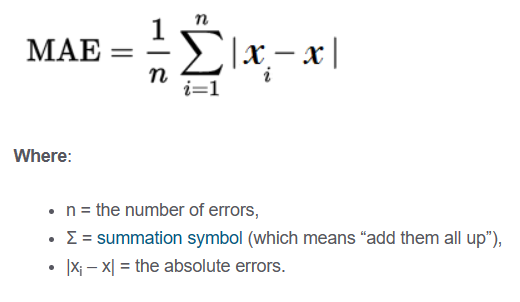

## <span style='color:rgb(205, 0, 153)'>3 | Data Overview </span><a class="anchor" id="overview"></a> 
[Back to Table of Contents](#overviewanchor)
<hr>

### <span style='color:rgb(205, 0, 153)'>3.1 | Dataset </span><a class="anchor" id="aboutdataset"></a> 
[Back to Table of Contents](#overviewanchor)

We used classic MovieLens dataset [[1](#1)] for building the Movie Recommendation System models using Machine Learning to predict ratings. The dataset is divided into four CSV files: ratings, movies, links, and tags. We will only use the ratings and movies datasets to create this recommender system. 

The ratings dataset contains approximately 600 users given over 100,000 ratings for more than 9,000 movies. The movies dataset contains the movieId the corresponding title of the movie, and the genre of each movie.

### <span style='color:rgb(205, 0, 153)'>3.2 | Import the dependencies and load the dataset </span><a class="anchor" id="loadinglib"></a> 
[Back to Table of Contents](#overviewanchor)

In [ ]:
#!pip install fastai

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
from platform import python_version
#import plotly.express as px
#import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

#from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import tensorflow as tf
from keras.models import load_model
from keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from keras.layers import Input, Embedding, Flatten, Dense, Dropout, concatenate, multiply, Dot

#### <span style='color:rgb(205, 0, 153)'>Check the Version </span><a class="anchor" id="distdata"></a> 

In [366]:
print('Python version:', python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.9.12
Tensorflow version: 2.9.1
Keras version: 2.9.0


In [250]:
# Please add path
rating_df = pd.read_csv('/ratings.csv')
movie_df = pd.read_csv('/movies.csv')

In [251]:
# Please add path
train_df = pd.read_csv('/train.csv')
test_df = pd.read_csv('/test.csv')

### <span style='color:rgb(205, 0, 153)'>Splitting the data into training and testing </span><a class="anchor" id="traintest"></a> 

In [330]:
#X = rating_df[['userId', 'movieId']].values
#y = rating_df['rating'].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
#X_train_arr = [X_train[:, 0], X_train[:, 1]]
#X_test_arr = [X_test[:, 0], X_test[:, 1]]

In [ ]:
#X_train, X_train_arr, X_train_arr[0].shape

In [ ]:
#train_df["rating"].replace({0.5:1,1.5:2,2.5:3,3.5:4,4.5:5},inplace=True)
#vals_to_replace = {0.5:1,1.0:1,1.5:2,2.0:2,2.5:3,3.0:3,3.5:4,4.0:4,4.5:5,5:5}
#train_df['rating_round']=train_df['rating'].map(vals_to_replace)
#test_df['rating_round']=test_df['rating'].map(vals_to_replace)
#rating_df['rating_round'] = rating_df['rating'].map(vals_to_replace)

### <span style='color:rgb(205, 0, 153)'>3.3 | Dimension of the dataset </span><a class="anchor" id="dtraintest"></a> 
[Back to Table of Contents](#overviewanchor)

### <span style='color:rgb(205, 0, 153)'>Dimension of the whole dataset </span><a class="anchor" id="distdata"></a> 

In [252]:
n_users, n_movies = len(rating_df.userId.unique()), len(rating_df.movieId.unique())
print("The whole dataset includes {} ratings by {} unique users for {} unique movies".format(len(rating_df),n_users,n_movies))

The whole dataset includes 100836 ratings by 610 unique users for 9724 unique movies


In [253]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [254]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### <span style='color:rgb(205, 0, 153)'>Dimension of the traing dataset </span><a class="anchor" id="disttrain"></a> 

In [255]:
n_users, n_movies = len(train_df.userId.unique()), len(train_df.movieId.unique())
print("The training dataset includes {} ratings by {} unique users for {} unique movies".format(len(train_df),n_users,n_movies))

The training dataset includes 80669 ratings by 610 unique users for 8954 unique movies


In [256]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80669 entries, 0 to 80668
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   80669 non-null  int64  
 1   movieId  80669 non-null  int64  
 2   rating   80669 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.8 MB


In [257]:
train_df.head()

,userId,movieId,rating
0,1,0,4.0
1,1,1,4.0
2,1,2,4.0
3,1,3,5.0
4,1,4,3.0


### <span style='color:rgb(205, 0, 153)'>Dimension of the test dataset </span><a class="anchor" id="distdata"></a> 

In [258]:
n_users, n_movies = len(test_df.userId.unique()), len(test_df.movieId.unique())
print("The training dataset includes {} ratings by {} unique users for {} unique movies".format(len(test_df),n_users,n_movies))

The training dataset includes 20167 ratings by 610 unique users for 5138 unique movies


In [259]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20167 entries, 0 to 20166
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   20167 non-null  int64  
 1   movieId  20167 non-null  int64  
 2   rating   20167 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 472.8 KB


In [260]:
test_df.head()

,userId,movieId,rating
0,1,0,5.0
1,1,1,5.0
2,1,2,4.0
3,1,3,4.0
4,1,4,4.0


## <span style='color:rgb(205, 0, 153)'>4 | Exploratory Data Analysis </span><a class="anchor" id="eda"></a> 
[Back to Table of Contents](#edaanchor)
<hr>

In [261]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#f4f0bb","figure.facecolor":"#f4f0bb"})
sns.set_context("poster",font_scale = .5)

palette = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#dcbd6e","#dddf00","#faa96e","#f36b3b","#ef3f28","#CC0028"]
palette_cmap=["#CC0028","#ef3f28","#f36b3b","#faa96e","#FEE08B","#fcdcb0","#6faea4","#008b99","#026e90","#00507A","#11264e"]

# sns.palplot(sns.color_palette(palette))
# sns.palplot(sns.color_palette(palette_cmap))
# plt.show()

### <span style='color:rgb(205, 0, 153)'>4.1 | Distribution of Ratings in the Whole Dataset </span><a class="anchor" id="distWhole"></a> 
[Back to Table of Contents](#edaanchor)
<hr>

Let's have a look on the distribution of ratings in the whole dataset :


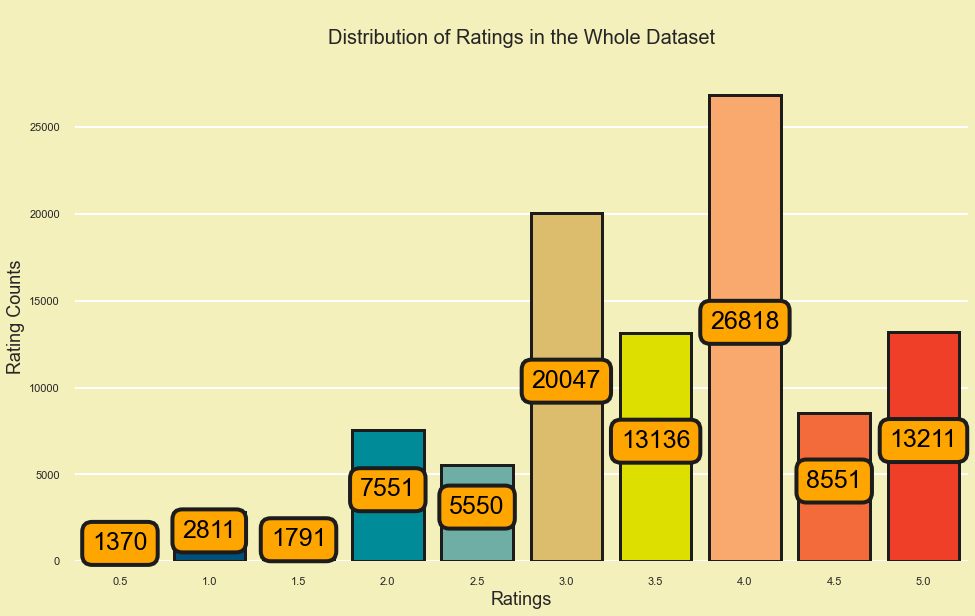

In [262]:
print("Let's have a look on the distribution of ratings in the whole dataset :")
plt.subplots(figsize=(16, 9))
cp=sns.countplot(x=rating_df["rating"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 3)
#p=sns.countplot(x=train_df["rating_round"],order=train_df["rating_round"].value_counts().index[:11],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
cp.axes.set_title("\nDistribution of Ratings in the Whole Dataset\n",fontsize=20)
cp.axes.set_xlabel("Ratings",fontsize=18)
cp.axes.set_ylabel("Rating Counts",fontsize=18)
cp.axes.set_xticklabels(cp.get_xticklabels(),rotation = 0)
for container in cp.containers:
    cp.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Graph indicates most of the users have watched movies with a 4 star rating and followed by 3 star and 5 star.

### <span style='color:rgb(205, 0, 153)'>4.2 | Content-based and well-liked based analysis on the Whole Dataset </span><a class="anchor" id="contentbasedWhole"></a> 
[Back to Table of Contents](#edaanchor)
<hr>

#### <span style='color:rgb(205, 0, 153)'>Movies distribution based on their overall average rating in the Whole Dataset </span><a class="anchor" id="distmovieswhole"></a> 

In [263]:
user_movie_data = pd.merge(rating_df, movie_df, how='inner', on='movieId')
user_movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [264]:
movies_highly_rated_avg = movie_rating_data.groupby(['title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
movies_highly_rated_avg = movies_highly_rated_avg.to_frame()

In [265]:
movies_highly_rated_avg.head(10)

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0
"Thin Line Between Love and Hate, A (1996)",5.0
Lesson Faust (1994),5.0
Eva (2011),5.0
Who Killed Chea Vichea? (2010),5.0


In [266]:
print(50*"*")
print("Number of movies with rating on average")
print(50*"*")
print("5 star rating on average == 5.0: ",len(movies_highly_rated_avg[movies_highly_rated_avg['rating'] == 5.0]))
print(">= 4 star and < 5 star rating on average: ",len(movies_highly_rated_avg[(movies_highly_rated_avg['rating'] >= 4.0) & (movies_highly_rated_avg['rating'] < 5.0)]))
print(">= 3 star and < 4 star rating on average: ",len(movies_highly_rated_avg[(movies_highly_rated_avg['rating'] >= 3.0) & (movies_highly_rated_avg['rating'] < 4.0)]))
print(">= 2 star and < 3 star rating on average: ",len(movies_highly_rated_avg[(movies_highly_rated_avg['rating'] >= 2.0) & (movies_highly_rated_avg['rating'] < 3.0)]))
print(">= 1 star and < 2 star rating on average: ",len(movies_highly_rated_avg[(movies_highly_rated_avg['rating'] >= 1.0) & (movies_highly_rated_avg['rating'] < 2.0)]))
print("< 1 star rating on average: ", len(movies_highly_rated_avg[(movies_highly_rated_avg['rating'] < 1.0)]))

**************************************************
Number of movies with rating on average
**************************************************
5 star rating on average == 5.0:  296
>= 4 star and < 5 star rating on average:  1972
>= 3 star and < 4 star rating on average:  4694
>= 2 star and < 3 star rating on average:  2121
>= 1 star and < 2 star rating on average:  528
< 1 star rating on average:  108


Let's have a look on Movies count based on their overall average rating :


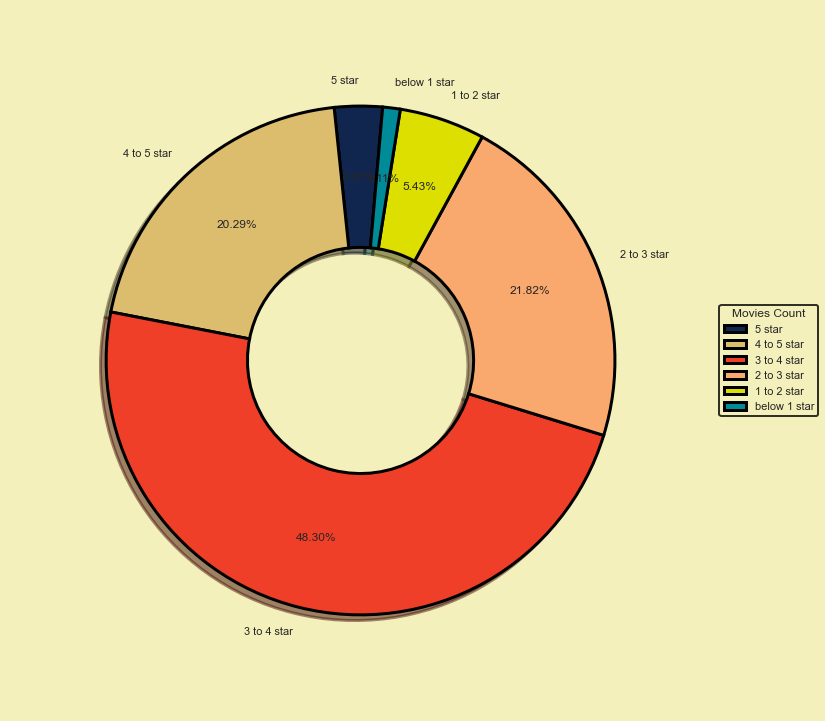

In [267]:
print(f"Let's have a look on Movies count based on their overall average rating :")
plt.subplots(figsize=(13, 13))

labels = '5 star', '4 to 5 star', '3 to 4 star', '2 to 3 star', '1 to 2 star', 'below 1 star'
sizes = [296, 1972, 4694, 2121, 528, 108]
size = 0.5

wedges, texts, autotexts = plt.pie(sizes, labels=labels,
                                    autopct = "%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#11264e","#dcbd6e","#ef3f28","#faa96e","#dddf00","#008b99"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 3),
                                    startangle = 85)

plt.legend(wedges, labels, title="Movies Count",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.show()

Pie chart shows, most of the users have watched movies with a 3 to 4 star rating and followed by 2 to 3 star and 4 to 5 star.

#### <span style='color:rgb(205, 0, 153)'>Content-based analysis</span><a class="anchor" id="contentwhole"></a> 

In [268]:
highly_viewed_movies = movie_rating_data.groupby(['title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)

In [269]:
highly_viewed_movies = highly_viewed_movies.to_frame()
highly_viewed_movies.reset_index(level=0, inplace=True)
highly_viewed_movies.columns = ['title', 'Number of viewers']

In [270]:
print(50*"*")
print("Number of movies with higher viewers")
print(50*"*")
print(">25 viewers: ",len(highly_viewed_movies[highly_viewed_movies['Number of viewers'] >= 25]))
print(">=20 and <25 viewers: ",len(highly_viewed_movies[(highly_viewed_movies['Number of viewers'] >= 20) & (highly_viewed_movies['Number of viewers'] < 25)]))
print(">=15 and <20 viewers: ",len(highly_viewed_movies[(highly_viewed_movies['Number of viewers'] >= 15) & (highly_viewed_movies['Number of viewers'] < 20)]))
print(">=10 and <15 viewers: ",len(highly_viewed_movies[(highly_viewed_movies['Number of viewers'] >= 10) & (highly_viewed_movies['Number of viewers'] < 15)]))
print(">=5 and <10 viewers: ",len(highly_viewed_movies[(highly_viewed_movies['Number of viewers'] >= 5) & (highly_viewed_movies['Number of viewers'] < 10)]))
print("<5 viewers: ", len(highly_viewed_movies[(highly_viewed_movies['Number of viewers'] < 5)]))

**************************************************
Number of movies with higher viewers
**************************************************
>25 viewers:  1050
>=20 and <25 viewers:  247
>=15 and <20 viewers:  353
>=10 and <15 viewers:  619
>=5 and <10 viewers:  1382
<5 viewers:  6068


Let's have a look on number of movies with higher viewers :


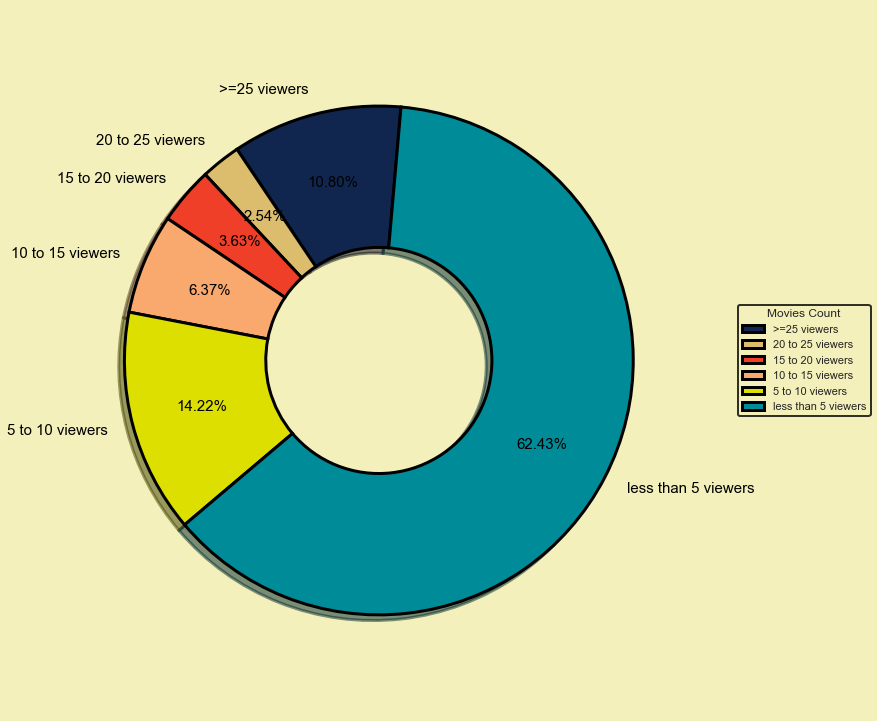

In [271]:
print(f"Let's have a look on number of movies with higher viewers :")
plt.subplots(figsize=(13, 13))

labels = '>=25 viewers', '20 to 25 viewers', '15 to 20 viewers', '10 to 15 viewers', '5 to 10 viewers', 'less than 5 viewers'
sizes = [1050, 247, 353, 619, 1382, 6068]
size = 0.5

wedges, texts, autotexts = plt.pie(sizes, labels=labels,
                                    textprops=dict(size= 15, color= "black"),
                                    autopct = "%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#11264e","#dcbd6e","#ef3f28","#faa96e","#dddf00","#008b99"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 3),
                                    startangle = 85)

plt.legend(wedges, labels, title="Movies Count",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.show()

We can see the movies which have more than 25 viewers (most watched).

In [272]:
highly_viewed_movies[highly_viewed_movies['Number of viewers'] >= 25]

,title,Number of viewers
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278
...,...,...
1045,King Kong (1933),25
1046,3:10 to Yuma (2007),25
1047,Her (2013),25
1048,Cape Fear (1991),25


In [273]:
highly_rated_highly_veiwed_movies = pd.merge(movies_highly_rated_avg, highly_viewed_movies, how = 'inner', on='title')
highly_rated_highly_veiwed_movies[highly_rated_highly_veiwed_movies['Number of viewers']>25].head(10)

,title,rating,Number of viewers
722,"Shawshank Redemption, The (1994)",4.429022,317
763,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.333333,27
782,"Philadelphia Story, The (1940)",4.310345,29
793,Lawrence of Arabia (1962),4.300000,45
798,Hoop Dreams (1994),4.293103,29
800,"Godfather, The (1972)",4.289062,192
801,Harold and Maude (1971),4.288462,26
808,Fight Club (1999),4.272936,218
809,Cool Hand Luke (1967),4.271930,57
810,Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),4.268041,97


In [274]:
highly_rated_highly_veiwed_movies[(highly_rated_highly_veiwed_movies['Number of viewers']>25) & (highly_rated_highly_veiwed_movies['rating']>=4.0)].head(10)

,title,rating,Number of viewers
722,"Shawshank Redemption, The (1994)",4.429022,317
763,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.333333,27
782,"Philadelphia Story, The (1940)",4.310345,29
793,Lawrence of Arabia (1962),4.300000,45
798,Hoop Dreams (1994),4.293103,29
800,"Godfather, The (1972)",4.289062,192
801,Harold and Maude (1971),4.288462,26
808,Fight Club (1999),4.272936,218
809,Cool Hand Luke (1967),4.271930,57
810,Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),4.268041,97


The top 10 films, as determined by how well-liked and popular they are among viewers. These received a rating of at least 4 from at least 25 viewers.

### <span style='color:rgb(205, 0, 153)'>4.3 | Distribution of Ratings in the Training Dataset </span><a class="anchor" id="distTrain"></a> 
[Back to Table of Contents](#edaanchor)
<hr>

Let's have a look on the distribution of ratings in the training dataset :


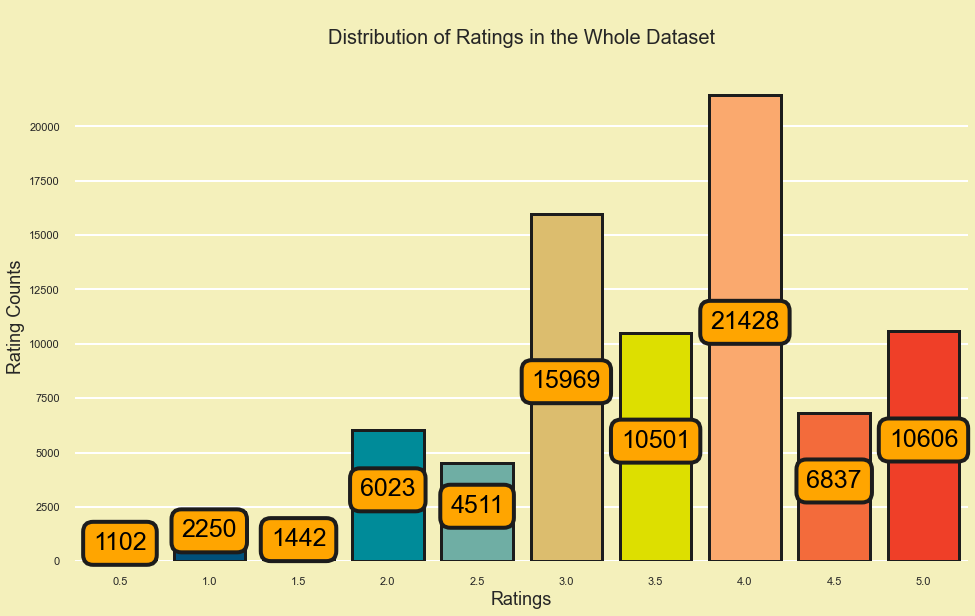

In [275]:
print("Let's have a look on the distribution of ratings in the training dataset :")
plt.subplots(figsize=(16, 9))
cp=sns.countplot(x=train_df["rating"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 3)
#p=sns.countplot(x=train_df["rating_round"],order=train_df["rating_round"].value_counts().index[:11],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
cp.axes.set_title("\nDistribution of Ratings in the Whole Dataset\n",fontsize=20)
cp.axes.set_xlabel("Ratings",fontsize=18)
cp.axes.set_ylabel("Rating Counts",fontsize=18)
cp.axes.set_xticklabels(cp.get_xticklabels(),rotation = 0)
for container in cp.containers:
    cp.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

### <span style='color:rgb(205, 0, 153)'>4.4 | Distribution of Ratings in the Test Dataset </span><a class="anchor" id="distTest"></a> 
[Back to Table of Contents](#edaanchor)
<hr>

Let's have a look on the distribution of ratings in the testing dataset :


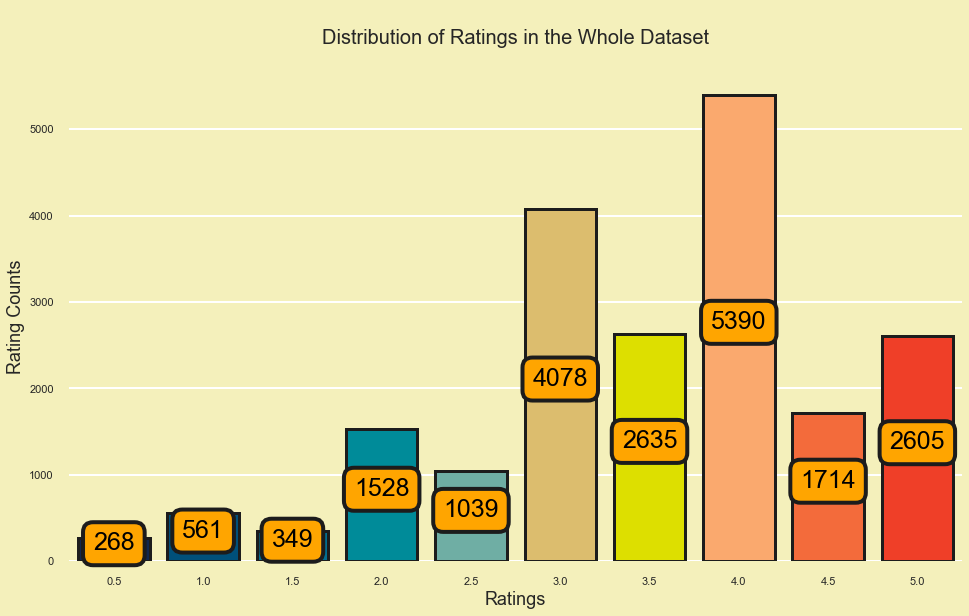

In [276]:
print("Let's have a look on the distribution of ratings in the testing dataset :")
plt.subplots(figsize=(16, 9))
cp=sns.countplot(x=test_df["rating"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 3)
#p=sns.countplot(x=train_df["rating_round"],order=train_df["rating_round"].value_counts().index[:11],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
cp.axes.set_title("\nDistribution of Ratings in the Whole Dataset\n",fontsize=20)
cp.axes.set_xlabel("Ratings",fontsize=18)
cp.axes.set_ylabel("Rating Counts",fontsize=18)
cp.axes.set_xticklabels(cp.get_xticklabels(),rotation = 0)
for container in cp.containers:
    cp.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

## <span style='color:rgb(205, 0, 153)'>5 | Building the Recommendation System Models </span><a class="anchor" id="modeling"></a> 
[Back to Table of Contents](#modelanchor)
<hr>

A movie recommendation system, also known as a movie recommender system, is a machine learning-based method to predicting users' movie preferences based on their previous choices and behaviour.

## <span style='color:rgb(205, 0, 153)'>5.1 | Model 1 - Matrix factorization method using Neural Networks </span><a class="anchor" id="model1"></a> 
[Back to Table of Contents](#modelanchor)
<hr>

__Matrix factorization__ is a type of collaborative filtering algorithm that is commonly used in recommendation systems. It works by decomposing the user-item interaction matrix into the product of two lower dimensionality rectangular matrices.

We have trained our model using matrix factorization, multi layer Perceptrons (MLP), and a neural network on the training dataset and assess the performance on the test dataset.

The concatenated layers are obtained from the matrix factorization and neural network over the user and item layer embeddings. Then, this concatenated layer is followed by an output layer and a relu activation function.

### <span style='color:rgb(205, 0, 153)'>5.1.1 | Model 1 - Define model and show the model summary </span><a class="anchor" id="m1"></a>

We have defined an embedding layer of dimension 40 each for users as well as movies. Following that, the embedding layers are flattened. For both user and movie, a dropout layer with a dropout factor of 0.2 is used. mean square error and mean absolute error are used as loss function and metrics. We have compiled our model using adam_optimizerwith learning_rate = 2e-3.

In [277]:
n_users, n_movies = len(train_df.userId.unique()), len(train_df.movieId.unique())
print("The training dataset includes {} ratings by {} unique users for {} unique movies".format(len(train_df),n_users,n_movies))

The training dataset includes 80669 ratings by 610 unique users for 8954 unique movies


In [278]:
from keras.layers import Input, Embedding, Flatten, Dense, Dropout,Concatenate, multiply, Dot
#import tensorflow as tf
#import keras

In [279]:
n_factors = 40


## Initializing a input layer for users
user = Input(shape=[1],name='User')

## Embedding layer for n_factors of users
u_embedding = Embedding(n_users+1,n_factors ,name = 'User-Embedding')(user)
u_vector = Flatten(name='user_flatten')(u_embedding)
u_vector = Dropout(0.2)(u_vector)


## Initializing a input layer for movies
movie = Input(shape=[1],name = 'Movie')

# movie_input = preprocessing.scale(movie_input)
## Embedding layer for n_factors of movies
m_embedding = Embedding(n_movies+1,n_factors ,name='Movie-Embedding')(movie)
m_vector = Flatten(name='movie_flatten')(m_embedding)
m_vector = Dropout(0.2)(m_vector)


## stacking up both user and movie embeddings
concat = concatenate([m_vector,u_vector])
concat_dropout = Dropout(0.2)(concat)

## Adding a Dense layer to the architecture
dense = Dense(20,name='Fully-Connected1',activation='relu')(concat)

outcome = Dense(1,activation='relu',name='Activation')(dense)

In [280]:
model1 = Model([user,movie],outcome)

#show model summary
model1.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Movie (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 User (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 Movie-Embedding (Embedding)    (None, 1, 40)        358200      ['Movie[0][0]']                  
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 40)        24440       ['User[0][0]']                   
                                                                                            

### <span style='color:rgb(205, 0, 153)'>5.1.2 | Model 1 - Compile the model using keras.optimizers.Adam </span><a class="anchor" id="m512"></a>

In [281]:
#!pip install pydot
#!pip install graphviz
adam_optimizer = tf.keras.optimizers.Adam(learning_rate = 2e-3)

## compile model
model1.compile(
    optimizer= adam_optimizer, 
    loss= ['mse'], 
    metrics=['mean_absolute_error']
)

### <span style='color:rgb(205, 0, 153)'>5.1.3 | Model 1 - Train the model </span><a class="anchor" id="m513"></a>
[Back to Table of Contents](#modelanchor)

In [282]:
## fit model
training_history_m1 = model1.fit([
    train_df['userId'],
    train_df['movieId']],
    train_df['rating'],
    batch_size = 256,
    #validation_data = ([test_df['userId'],test_df['movieId']],test_df['rating']),
    validation_split = 0.1,
    epochs = 10,
    verbose = 1
)
print("The model has successfully trained")

Epoch 1/10
284/284 [==============================] - 7s 15ms/step - loss: 2.4034 - mean_absolute_error: 1.1259 - val_loss: 4.7421 - val_mean_absolute_error: 1.9512
Epoch 2/10
284/284 [==============================] - 4s 13ms/step - loss: 0.7932 - mean_absolute_error: 0.6894 - val_loss: 4.2926 - val_mean_absolute_error: 1.8456
Epoch 3/10
284/284 [==============================] - 4s 13ms/step - loss: 0.7517 - mean_absolute_error: 0.6698 - val_loss: 3.5518 - val_mean_absolute_error: 1.6555
Epoch 4/10
284/284 [==============================] - 4s 13ms/step - loss: 0.7246 - mean_absolute_error: 0.6556 - val_loss: 2.9304 - val_mean_absolute_error: 1.4832
Epoch 5/10
284/284 [==============================] - 4s 13ms/step - loss: 0.7063 - mean_absolute_error: 0.6450 - val_loss: 2.2437 - val_mean_absolute_error: 1.2707
Epoch 6/10
284/284 [==============================] - 4s 14ms/step - loss: 0.6882 - mean_absolute_error: 0.6351 - val_loss: 1.6715 - val_mean_absolute_error: 1.0698
Epoch 7/10

In [283]:
pd.DataFrame(training_history_m1.history)

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,2.403375,1.125936,4.742062,1.951157
1,0.793218,0.689393,4.292586,1.845568
2,0.751707,0.669826,3.551814,1.655541
3,0.724618,0.655637,2.930379,1.483203
4,0.706323,0.645015,2.243701,1.270713
5,0.688244,0.635137,1.671534,1.069808
6,0.676390,0.627950,1.359601,0.948689
7,0.667156,0.623055,1.254143,0.906891
8,0.656370,0.616515,1.110810,0.847153
9,0.645858,0.611132,1.048608,0.819287


### <span style='color:rgb(205, 0, 153)'>5.1.4 | Model 1 - Learning Curves </span><a class="anchor" id="m513"></a>
[Back to Table of Contents](#modelanchor)

Learning curves :


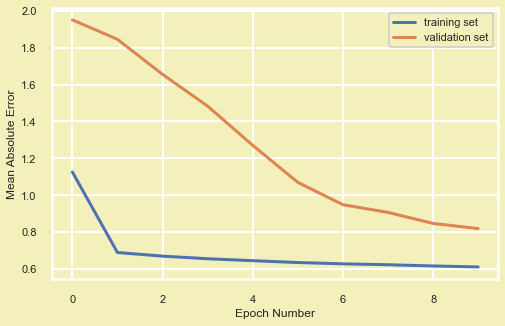

In [284]:
print("Learning curves :")
plt.subplots(figsize=(8, 5))

plt.xlabel('Epoch Number')
plt.ylabel('Mean Absolute Error')
plt.plot(training_history_m1.history['mean_absolute_error'], label='training set')
plt.plot(training_history_m1.history['val_mean_absolute_error'], label='validation set')
plt.legend()

### <span style='color:rgb(205, 0, 153)'>5.1.5 | Model 1 - Model evaluation on test data </span><a class="anchor" id="m513"></a>
[Back to Table of Contents](#modelAnchor)

In [285]:
rmse1, mae1 = model1.evaluate(x=[test_df['userId'],test_df['movieId']],y=test_df['rating'],verbose=0)

In [286]:
rmse1, mae1

(1.2422089576721191, 0.8723188638687134)

In [287]:
#trainingPerformance = pd.DataFrame(columns = ['S.No.','Method','Mean Absolute Error']) 
testingPerformance = pd.DataFrame(columns = ['S.No.','Model', 'Method','Mean Absolute Error'])

In [288]:
testingPerformance = testingPerformance.append({'S.No.' : 1, 'Model':'Model 1', 'Method' : 'Matrix factorization method using Neural Networks', 'Mean Absolute Error' : mae1}, ignore_index = True) 
testingPerformance

,S.No.,Model,Method,Mean Absolute Error
0,1,Model 1,Matrix factorization method using Neural Networks,0.872319


## <span style='color:rgb(205, 0, 153)'>5.2 | Model 2 - Tabular Data Method using Neural Network </span><a class="anchor" id="model2"></a> 
[Back to Table of Contents](#modelanchor)
<hr>

### <span style='color:rgb(205, 0, 153)'>5.2.1 | Model 2 - Define model and show the model summary </span><a class="anchor" id="m511"></a>

In the second model, We have used Tabular data method using Neural Network to predict the ratings. The model includes an embedding layer of 50 dimensions for both users and movies. Following that, the embedding layers are flattened. For both user and movie, a dropout layer with a dropout factor of 0.2 is used. mean square error and mean absolute error are used as loss function and metrics. We have compiled our model using adam_optimizerwith learning_rate = 2e-3.

In [289]:
n_users = len(train_df.userId.unique())
n_movies = len(train_df.movieId.unique())
print("The training dataset includes {} ratings by {} unique users for {} unique movies".format(len(train_df),n_users,n_movies))

The training dataset includes 80669 ratings by 610 unique users for 8954 unique movies


In [290]:
n_factors = 50


## Initializing a input layer for users
user = Input(shape=[1],name = 'User')

## Embedding layer for n_factors of users
u_embedding = Embedding(n_users+1,n_factors,name='User-Embedding')(user)
u_vector = Flatten(name='User-Flatten')(u_embedding)
u_vector = Dropout(0.2)(u_vector)

## Initializing a input layer for movies
movie = Input(shape=[1],name='Movie')

## Embedding layer for n_factors of movies
m_embedding = Embedding(n_movies+1,n_factors,name='Movie-Embedding')(movie)
m_vector = Flatten(name='Movie-Flatten')(m_embedding)
m_vector = Dropout(0.2)(m_vector)



#concatenate flattened values
concat = concatenate([m_vector,u_vector])
concat_dropout = Dropout(0.2)(concat)

## Adding a Dense layer to the architecture
dense_1 = Dense(20,name='Fully-Connected1',activation ='relu')(concat)


outcome = Dense(1,activation='relu',name='Activation')(dense_1)

In [291]:
model2 = Model([user,movie],outcome)
model2.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Movie (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 User (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 Movie-Embedding (Embedding)    (None, 1, 50)        447750      ['Movie[0][0]']                  
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 50)        30550       ['User[0][0]']                   
                                                                                            

### <span style='color:rgb(205, 0, 153)'>5.2.2 | Model 2 - Compile the model using keras.optimizers.Adam </span><a class="anchor" id="m522"></a>
[Back to Table of Contents](#modelanchor)

In [292]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate = 2e-3)

## compile model
model2.compile(
    optimizer= adam_optimizer, 
    loss= ['mse'], 
    metrics=['mean_absolute_error']
)

### <span style='color:rgb(205, 0, 153)'>5.2.3 | Model 2 - Train the model </span><a class="anchor" id="m523"></a>
[Back to Table of Contents](#modelanchor)

In [293]:
training_history_m2 = model2.fit([train_df['userId'], 
                                  train_df['movieId']],
                                  train_df['rating'],
                                  batch_size = 256,
                                  validation_split = 0.01,
                                  epochs = 10,
                                  verbose = 1)

Epoch 1/10
312/312 [==============================] - 8s 18ms/step - loss: 2.3023 - mean_absolute_error: 1.0965 - val_loss: 0.5833 - val_mean_absolute_error: 0.5914
Epoch 2/10
312/312 [==============================] - 5s 16ms/step - loss: 0.7809 - mean_absolute_error: 0.6832 - val_loss: 0.5615 - val_mean_absolute_error: 0.5829
Epoch 3/10
312/312 [==============================] - 5s 16ms/step - loss: 0.7412 - mean_absolute_error: 0.6637 - val_loss: 0.5756 - val_mean_absolute_error: 0.5863
Epoch 4/10
312/312 [==============================] - 5s 15ms/step - loss: 0.7211 - mean_absolute_error: 0.6520 - val_loss: 0.6118 - val_mean_absolute_error: 0.6060
Epoch 5/10
312/312 [==============================] - 5s 16ms/step - loss: 0.6991 - mean_absolute_error: 0.6408 - val_loss: 0.5817 - val_mean_absolute_error: 0.5918
Epoch 6/10
312/312 [==============================] - 5s 17ms/step - loss: 0.6837 - mean_absolute_error: 0.6319 - val_loss: 0.5749 - val_mean_absolute_error: 0.5900
Epoch 7/10

In [296]:
pd.DataFrame(training_history_m2.history)

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,2.302268,1.096508,0.583317,0.591352
1,0.780942,0.683190,0.561472,0.582881
2,0.741238,0.663730,0.575561,0.586276
3,0.721099,0.652017,0.611788,0.605999
4,0.699119,0.640792,0.581667,0.591768
5,0.683712,0.631928,0.574888,0.589994
6,0.667373,0.622603,0.605879,0.602095
7,0.653237,0.615025,0.611926,0.605923
8,0.643312,0.609157,0.634208,0.620289
9,0.631449,0.603148,0.612716,0.601793


### <span style='color:rgb(205, 0, 153)'>5.2.4 | Model 2 - Learning Curves </span><a class="anchor" id="m513"></a>
[Back to Table of Contents](#modelanchor)

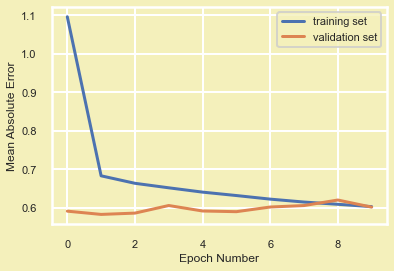

In [297]:
plt.xlabel('Epoch Number')
plt.ylabel('Mean Absolute Error')
plt.plot(training_history_m2.history['mean_absolute_error'], label='training set')
plt.plot(training_history_m2.history['val_mean_absolute_error'], label='validation set')
plt.legend()

### <span style='color:rgb(205, 0, 153)'>5.2.5 | Model 2 - Model evaluation on test data </span><a class="anchor" id="m525"></a>
[Back to Table of Contents](#modelAnchor)

In [298]:
rmse2, mae2 = model2.evaluate(x=[test_df['userId'],test_df['movieId']],y=test_df['rating'],verbose=0)

In [299]:
rmse2,mae2

(1.2521671056747437, 0.8707090020179749)

In [300]:
testingPerformance = testingPerformance.append({'S.No.' : 2, 'Model':'Model 2', 'Method' : 'Tabular Data Method using Neural Network', 'Mean Absolute Error' : mae2}, ignore_index = True) 
testingPerformance

,S.No.,Model,Method,Mean Absolute Error
0,1,Model 1,Matrix factorization method using Neural Networks,0.872319
1,2,Model 2,Tabular Data Method using Neural Network,0.870709


## <span style='color:rgb(205, 0, 153)'>5.3 | Model 3 - Collaborative Filtering Model using fast.ai </span><a class="anchor" id="model3"></a> 
[Back to Table of Contents](#modelanchor)
<hr>

__Collaborative filtering Recommendation system__ is a method of making predictions about the interests of a user by collecting preferences from many users. The underlying assumption is that if a person A has the same opinion as a person B on an issue, A is more likely to have B's opinion on a different issue than that of a randomly chosen person. - [Wikipedia]

### <span style='color:rgb(205, 0, 153)'>5.3.1 | Model 3 - Define the model </span><a class="anchor" id="m531"></a>

We are representing each userId user and each movieId m by vector of a predefined length n. The rating for the movie m by the user u, as predicted by the model is simply the dot product of the two vectors.

In [301]:
# %%script false 
#sys.path.append('../fastai')
## import fast.ai modules
from fastai import *
from fastai.collab import *
from fastai.tabular import *
#from fastai.collab import CollabDataLoaders, collab_learner

## define user/item column names in the training data
user, item = 'userId','movieId'
data = CollabDataLoaders.from_df(train_df, seed=42 )
y_range = [0, 5.5]
model3_learn = collab_learner(data, n_factors = 10, y_range = y_range)

### <span style='color:rgb(205, 0, 153)'>5.3.2 | Model 3 - Find the best learning rate </span><a class="anchor" id="m532"></a>

We utilise the learning rate finder using lr_find() function to choose a best rate for the optimizer before we train the model.


SuggestedLRs(valley=0.03981071710586548)

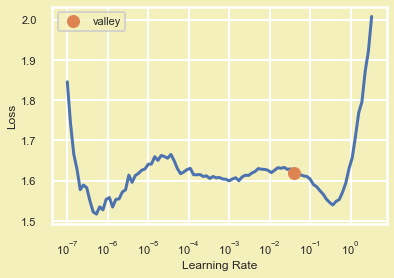

In [302]:
model3_learn.lr_find()
#learn.recorder.plot()

By looking at the graph, we can observe that the best learning rate suggested  is approximately 0.06. Y - axis depicts the learning loss while X-axis depicts the learning rate. Red dot shows the minimum gradient of the learning curve. Here, we train for 5 epochs.

### <span style='color:rgb(205, 0, 153)'>5.3.3 | Model 3 - Train the model </span><a class="anchor" id="m533"></a>
[Back to Table of Contents](#modelanchor)

In [304]:
model3_learn.fit_one_cycle(5, 0.01, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.583487,0.759095,00:19
1,0.646768,0.758720,00:22
2,0.613000,0.743136,00:23
3,0.503939,0.736778,00:21
4,0.398371,0.739038,00:18


### <span style='color:rgb(205, 0, 153)'>5.3.4 | Model 3 - Model evaluation on the test data  </span><a class="anchor" id="m534"></a>
[Back to Table of Contents](#modelanchor)

In [306]:
test_dl = model3_learn.dls.test_dl(test_df)
preds, y = model3_learn.get_preds(dl=test_dl)

In [307]:
preds,y

(tensor([4.3707, 4.1439, 4.2462,  ..., 3.1954, 3.1968, 3.2686]),
 tensor([[5.0000],
         [5.0000],
         [4.0000],
         ...,
         [4.0000],
         [3.5000],
         [3.5000]]))

In [308]:
preds, y = model3_learn.get_preds(dl=test_dl)
#preds, _, decoded = learn.get_preds(dl=test_dl, with_decoded=True)

In [309]:
from sklearn.metrics import mean_absolute_error as mae
mae3 = mae(y,preds)

In [310]:
testingPerformance = testingPerformance.append({'S.No.' : 3, 'Model':'Model 3','Method' : 'Collaborative Filtering Model using fast.ai', 'Mean Absolute Error' : mae3}, ignore_index = True) 
testingPerformance

,S.No.,Model,Method,Mean Absolute Error
0,1,Model 1,Matrix factorization method using Neural Networks,0.872319
1,2,Model 2,Tabular Data Method using Neural Network,0.870709
2,3,Model 3,Collaborative Filtering Model using fast.ai,0.835754


## <span style='color:rgb(205, 0, 153)'>5.4 | Model 4 - Collaborative Filtering with Neural Network (fast.ai) </span><a class="anchor" id="model4"></a> 
[Back to Table of Contents](#modelanchor)
<hr>

### <span style='color:rgb(205, 0, 153)'>5.4.1 | Model 4 - Define the model </span><a class="anchor" id="m541"></a>
[Back to Table of Contents](#modelanchor)

In [311]:
# %%script false 

## import fast.ai modules
from fastai import *
from fastai.collab import *
from fastai.tabular import *

## define user/item column names in the training data
user, item = 'userId','movieId'
#data = CollabDataBunch.from_df(train_df, seed=42, test=test_df)
data = CollabDataLoaders.from_df(train_df, seed=42, test=test_df)
y_range = [0, 5.5]
emb_szs_param= {}
emb_szs_param['movieId']=50
emb_szs_param['userId']=50
model4_learn = collab_learner(data, use_nn=True, n_factors = 10,emb_szs=emb_szs_param, layers=[256,128,64],y_range = y_range)

### <span style='color:rgb(205, 0, 153)'>5.4.2 | Model 4 - Find the best learning rate </span><a class="anchor" id="m542"></a>

We utilise the learning rate finder using lr_find() function to choose a best rate for the optimizer before we train the model.

SuggestedLRs(valley=0.001737800776027143)

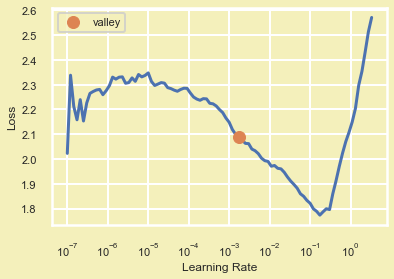

In [312]:
model4_learn.lr_find()

By looking at the graph, we can observe that the best learning rate suggested is approximately 0.005. Y - axis depicts the learning loss while X-axis depicts the learning rate. Red dot shows the minimum gradient of the learning curve. Here, we train for 5 epochs.

### <span style='color:rgb(205, 0, 153)'>5.4.3 | Model 4 - Train the model </span><a class="anchor" id="m543"></a>

In [313]:
model4_learn.fit_one_cycle(3, 0.005, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.834588,0.834273,00:36
1,0.745842,0.755771,00:43
2,0.653942,0.750931,00:42


### <span style='color:rgb(205, 0, 153)'>5.4.4 | Model 4 - Model evaluation on the test data  </span><a class="anchor" id="m544"></a>
[Back to Table of Contents](#modelanchor)

In [314]:
test_dl = model4_learn.dls.test_dl(test_df)
preds, y = model4_learn.get_preds(dl=test_dl)

In [315]:
from sklearn.metrics import mean_absolute_error as mae
mae4 = mae(y,preds)

In [316]:
testingPerformance = testingPerformance.append({'S.No.' : 4, 'Model':'Model 4', 'Method' : 'Collaborative Filtering Model with Neural Network (fast.ai)', 'Mean Absolute Error' : mae4}, ignore_index = True) 

In [474]:
#testingPerformance = testingPerformance.drop(4)

## <span style='color:rgb(205, 0, 153)'>6 | Results and Model Comparison </span><a class="anchor" id="modelcomparison"></a> 
[Back to Table of Contents](#modelanchor)
<hr>

We have compare performance of four models 1) Matrix factorization method using Neural Networks, 2) Tabular Data Method using NN, 3) Collaborative Filtering Model using fast.ai and 4) Collaborative Filtering Model with Neural Network (fast.ai).	

### <span style='color:rgb(205, 0, 153)'>6.2 | Performance of the models </span><a class="anchor" id="modelcomparison"></a> 
[Back to Table of Contents](#modelanchor)

In [317]:
testingPerformance

,S.No.,Model,Method,Mean Absolute Error
0,1,Model 1,Matrix factorization method using Neural Networks,0.872319
1,2,Model 2,Tabular Data Method using Neural Network,0.870709
2,3,Model 3,Collaborative Filtering Model using fast.ai,0.835754
3,4,Model 4,Collaborative Filtering Model with Neural Network (fast.ai),0.826046


Let's have a look on the performance of the models:


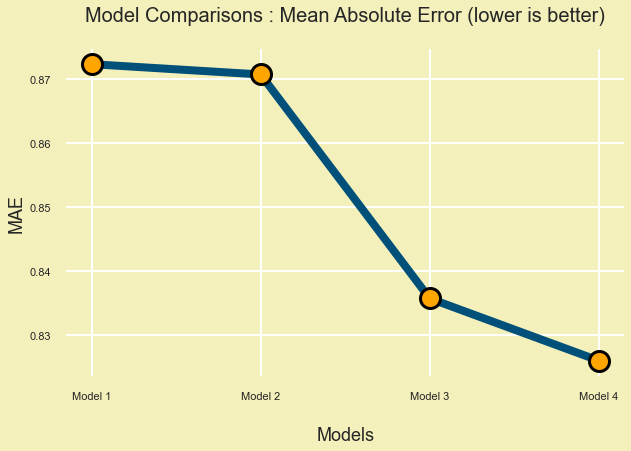

In [318]:
print(f"Let's have a look on the performance of the models:")
plt.subplots(figsize=(10,6))

lp=sns.lineplot(x=testingPerformance["Model"] ,y=testingPerformance["Mean Absolute Error"],data=testingPerformance,color=palette[1],marker="o",linewidth=8,markersize=20,markerfacecolor="orange",markeredgecolor="black",markeredgewidth=3)
lp.axes.set_title("Model Comparisons : Mean Absolute Error (lower is better)\n",fontsize=20)
lp.axes.set_xlabel("\nModels",fontsize=18)
lp.axes.set_ylabel("MAE",fontsize=18)

sns.despine(left=True, bottom=True)
plt.show()

In [319]:
print("The mean absolute error achieved by \nmodel1 = {}, \nmodel2 = {}, \nmodel3 = {}, \nand model4 = {}".format(mae1,mae2,mae3,mae4))

The mean absolute error achieved by 
model1 = 0.8723188638687134, 
model2 = 0.8707090020179749, 
model3 = 0.8357543349266052, 
and model4 = 0.8260462880134583


The best prediction performance was achieved by __Model 4 (Collaborative Filtering with Neural Network (fast.ai))__, which is 0.8245 mean absolute error.

### <span style='color:rgb(205, 0, 153)'>7 | Saving and Loading the Model for the Deployment </span><a class="anchor" id="modeldeployment"></a> 
[Back to Table of Contents](#modelanchor)

In [320]:
model4_learn.export('D:/Learner CARES/Kaggle/Recomendation System/Final/model4_learn.pkl')

In [177]:
model4_learn

#### <span style='color:rgb(205, 0, 153)'>Saving the Model </span><a class="anchor" id="savemodel"></a> 
[Back to Table of Contents](#modelanchor)

In [321]:
import pickle
# Please add path
pickle.dump(model4_learn, open('/model4.pkl', 'wb'))

#### <span style='color:rgb(205, 0, 153)'>Loading the Model </span><a class="anchor" id="loadmodel"></a> 
[Back to Table of Contents](#modelanchor)

In [322]:
# Please add path
model = pickle.load(open('/model4.pkl', 'rb'))
#model = load_learner('D:/Learner CARES/Kaggle/Recomendation System/Final/model4_learn.pkl', cpu=False)

In [181]:
test_dl = model.dls.test_dl(pd.DataFrame( {'userId': [610], 'movieId': [0]}))
preds, y = model.get_preds(dl=test_dl)

In [182]:
preds, y

(tensor([[4.2939]]), None)

### <span style='color:rgb(205, 0, 153)'>8 | Movie Recommendation System </span><a class="anchor" id="MRSExample"></a> 
[Back to Table of Contents](#modelanchor)

In [359]:
def Movie_Recommendation_System(user_Id, model, num_movies):
    print("")
    #print("Already watched movies by the User:")
    #print(list(user_movie_data[user_movie_data['userId'] == user_Id]['title']))
    print("")
    watched_movies = list(user_movie_data[user_movie_data['userId'] == user_Id]['movieId'])
    unwatched_movies = [i for i in range(min(user_movie_data['movieId']), max(user_movie_data['movieId'])+1) if i not in watched_movies]
    model_input = pd.DataFrame( {'userId': user_id*len(unwatched_movies), 'movieId': unwatched_movies})
    test_dl = model.dls.test_dl(model_input)
    preds, y = model.get_preds(dl=test_dl)
    model_output = model_input
    model_output['pred_ratings'] = preds
    model_output = model_output.sort_values(by=['pred_ratings'], ascending=False)
    model_output = pd.merge(model_output, movie_df, how='inner', on='movieId')
    recommended_movies = model_output['title']
    print("*"*120)
    print("Top "+str(num_movies)+" Movie Recommendations for the User "+str(user_Id)+ " are:")
    print(list(recommended_movies[:num_movies]))
    print("*"*120)

In [356]:
user_movie_data.head(5)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [360]:
# Please add path
model = pickle.load(open('/model4.pkl', 'rb'))
print("Please Enter User Id:")
#user_Id= 610
user_Id= int(input())
print("")
print("Enter Number of Movies to be Recommended by the Model:")
#num_movies = 5
num_movies = int(input())
Movie_Recommendation_System(user_Id,model,num_movies)

Please Enter User Id:
17

Enter Number of Movies to be Recommended by the Model:
5




************************************************************************************************************************
Top 5 Movie Recommendations for the User 17 are:
['Party Girl (1995)', 'Speechless (1994)', 'Casino (1995)', 'Center of the World, The (2001)', '39 Steps, The (1935)']
************************************************************************************************************************


## <span style='color:rgb(205, 0, 153)'>References </span><a class="anchor" id="references"></a> 

1. F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19 <a class="anchor" id="1"></a>

2. Howard J, Gugger S. Fastai: a layered API for deep learning. Information. 2020 Feb 16;11(2):108.<a class="anchor" id="2"></a>